In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy_financial as npf


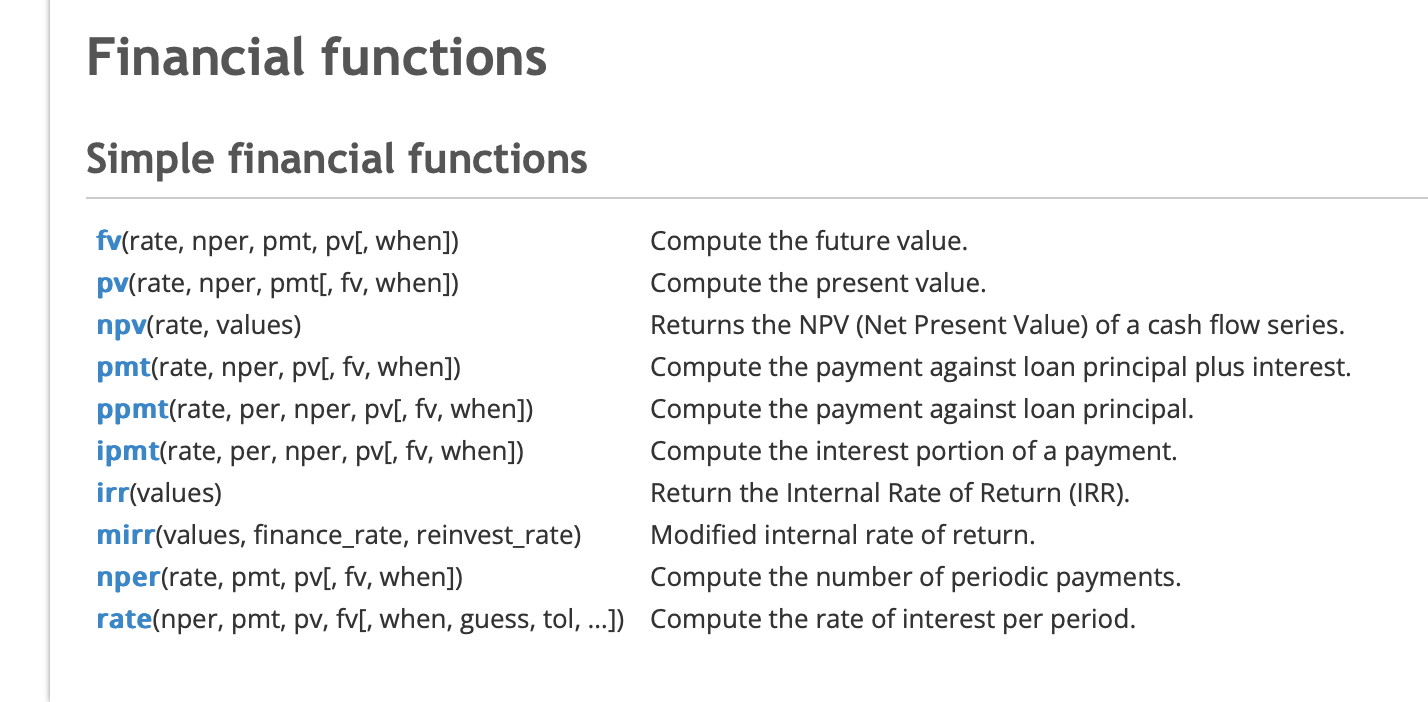

In [9]:
def calculate_bond_price(face_value, coupon_rate, ytm, ttm):
    """
    Calculates the price of a corporate bond.

    Parameters:
    - face_value (float): The face value of the bond.
    - coupon_rate (float): The annual coupon rate of the bond.
    - yield_rate (float): The yield rate of the bond.
    - ttm (int): The number of years until the bond matures.
    - Recovery Rate
    Returns:
    - bond_price (float): The price of the bond.
    """
    coupon_payment = face_value * coupon_rate
    discount_factor = 1 / (1 + ytm) ** ttm
    present_value = coupon_payment * ((1 - discount_factor) / ytm) + face_value * discount_factor

    bond_price = round(present_value, 2)
    
    return bond_price



In [4]:
# Define the data
data = {
    'Year': [1, 2, 3, 4, 5],
    'Spot Rate': [0.02, 0.04, 0.05, 0.055, 0.06],
    'Cash Flow': [60, 60, 60, 60, 1060],
    'PV': [58.82, 55.47, 51.83, 48.43, 792.09]
}

# Create a DataFrame
df_bond = pd.DataFrame(data)

In [11]:
# calculate PV of bond row by row using the formula PV = CF / (1 + r)^n
PV_calc = 'PV_calc'

df_bond[PV_calc] = df_bond['Cash Flow'] / (1 + df_bond['Spot Rate']) ** df_bond['Year']

In [7]:
df_bond

,Year,Spot Rate,Cash Flow,PV,PV_calc
0,1,0.020,60,58.82,58.823529
1,2,0.040,60,55.47,55.473373
2,3,0.050,60,51.83,51.830256
3,4,0.055,60,48.43,48.433005
4,5,0.060,1060,792.09,792.093663


In [10]:
"""Probability of Default (PD) = Credit Spread / (1 - Recovery Rate)"""
def calculate_pd(credit_spread, recovery_rate):
    
    probability_of_default = credit_spread / (1 - recovery_rate)
    
    return probability_of_default

In [13]:
import numpy as np
def risk_free_bond(ttm,coupon,principal):
    
    price = df_bond['PV_calc'].sum()

    ytm = npf.irr(df_bond['Cash Flow'])
    
    return ytm, price
    
risk_free_bond(5,.06 ,1000)
    

(nan, 1006.6538259408709)

In [8]:
corporate_bond_price = calculate_bond_price(1000, 0.06, 0.07, 5)

In [ ]:
risk_free_bond_price = calculate_bond_price(1000, 0.03, 0.05, 5)